Ссылка на репозиторий github: https://github.com/data-analyst-mr/ds_projects

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-датасета-и-общая-информация" data-toc-modified-id="Загрузка-датасета-и-общая-информация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка датасета и общая информация</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Функции" data-toc-modified-id="Функции-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Функции</a></span></li><li><span><a href="#Разделение-датафрейма-на-выборки-и-определение-баланса" data-toc-modified-id="Разделение-датафрейма-на-выборки-и-определение-баланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разделение датафрейма на выборки и определение баланса</a></span></li><li><span><a href="#Определение-лучшей-модели-прогнозирования-на-несбалансированных-данных" data-toc-modified-id="Определение-лучшей-модели-прогнозирования-на-несбалансированных-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Определение лучшей модели прогнозирования на несбалансированных данных</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Определение-лучшей-модели,-обученной-на-выборке,-сбалансированной-методом-SMOTE" data-toc-modified-id="Определение-лучшей-модели,-обученной-на-выборке,-сбалансированной-методом-SMOTE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определение лучшей модели, обученной на выборке, сбалансированной методом SMOTE</a></span></li><li><span><a href="#Определение-лучшей-модели,-обученной-на-выборке,-сбалансированной-методом-RandomUnderSampler" data-toc-modified-id="Определение-лучшей-модели,-обученной-на-выборке,-сбалансированной-методом-RandomUnderSampler-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Определение лучшей модели, обученной на выборке, сбалансированной методом RandomUnderSampler</a></span></li><li><span><a href="#Определение-лучшей-модели,-обученной-на-выборке,-сбалансированной-взвешиванием-классов" data-toc-modified-id="Определение-лучшей-модели,-обученной-на-выборке,-сбалансированной-взвешиванием-классов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Определение лучшей модели, обученной на выборке, сбалансированной взвешиванием классов</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

**Заказчик исследования:** маркетинговый отдел банка.  
**Цель исследования:** построить модель, способную с высокой точностью (F1 не менее 0.59) спрогнозировать, уйдет клиент или нет.  

**Исходные данные:**  
Исходные данные представлены в датасете "Churn.csv".  
В датасете содержатся следующие признаки:  
- "RowNumber" — индекс строки в данных;  
- "CustomerId" — уникальный идентификатор клиента;  
- "Surname" — фамилия;  
- "CreditScore" — кредитный рейтинг;  
- "Geography" — страна проживания;  
- "Gender" — пол;  
- "Age" — возраст;  
- "Tenure" — сколько лет человек является клиентом банка;  
- "Balance" — баланс на счёте;  
- "NumOfProducts" — количество продуктов банка, используемых клиентом;  
- "HasCrCard" — наличие кредитной карты;  
- "IsActiveMember" — активность клиента;  
- "EstimatedSalary" — предполагаемая зарплата.  


Целевой признак: "Exited" — факт ухода клиента.  

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Загрузка датасета и общая информация

Импортируем библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

Загружаем датасет:

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

Выводим общую информацию по датафрейму:

In [3]:
def inf(df_info):
    print()
    print('Общая информация:')
    display(df_info.info(memory_usage='deep'))
    print('____________________________________________________')
    print()
    print('Описательная статистика строковых значений:')
    display(df_info.describe(include='object').T)
    print('____________________________________________________')
    print()
    print('Описательная статистика числовых значений:')
    display(df_info.describe().T)
    print('____________________________________________________')
    print()
    print('Процент пропущенных значений:')
    display(df_info.isna().mean()*100)
    print('____________________________________________________')
    print()
    print('Случайная выборка датафрейма:')
    display(df_info.sample(n = 5, random_state = 0))
    print('____________________________________________________')
    print()

In [4]:
inf(df)


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 2.6 MB


None

____________________________________________________

Описательная статистика строковых значений:


,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


____________________________________________________

Описательная статистика числовых значений:


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


____________________________________________________

Процент пропущенных значений:


RowNumber          0.00
CustomerId         0.00
Surname            0.00
CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.00
Tenure             9.09
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

____________________________________________________

Случайная выборка датафрейма:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9394,9395,15615753,Upchurch,597,Germany,Female,35,8.0,131101.04,1,1,1,192852.67,0
898,899,15654700,Fallaci,523,France,Female,40,2.0,102967.41,1,1,0,128702.10,1
2398,2399,15633877,Morrison,706,Spain,Female,42,8.0,95386.82,1,1,1,75732.25,0
5906,5907,15745623,Worsnop,788,France,Male,32,4.0,112079.58,1,0,0,89368.59,0
2343,2344,15765902,Gibson,706,Germany,Male,38,5.0,163034.82,2,1,1,135662.17,0


____________________________________________________



Исходный датафрейм состоит из 10000 и 14 столбцов.  
В столбце "Tenure" пропущено 9.09% значений.  
Значения "Surname", "Geography" и "Gender" имеют тип "object".

### Предобработка данных

**Обработка названий столбцов**

Переводим названия в нижний регистр и избавляемся от "верблюжьего регистра":

In [5]:
df.columns = map(str.lower, df.columns)
df = df.rename(columns={'rownumber' : 'row_number',
                       'customerid' : 'customer_id',
                       'creditscore' : 'credit_score',
                       'numofproducts' : 'num_of_products',
                       'hascrcard' : 'has_cr_card',
                       'isactivemember' : 'is_active_member',
                       'estimatedsalary' : 'estimated_salary',})

**Обработка пропущенных значений**

Процент пропущенных значений в столбце "Tenure" составляет 9.09%. Удалять их нежелательно: это приведет к искажению результатов исследования. Заменяем пропущенные значения на медианы, рассчитанные по стране и возрасту клиента:

In [6]:
for i in df['geography'].unique():
    for j in df['age'].unique():
        df.loc[(df['geography'] == i) & (df['age'] == j), 'tenure'] =\
        df.loc[(df['geography'] == i) & (df['age'] == j)]['tenure'].median()

Выводим общую информацию об обработанном датафрейме:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Вывод:**
1. Обработаны названия столбцов: приведены к нижнему регистру, убран "верблюжий регистр".
2. Обработаны пропущенные значения.

## Исследование задачи

Задаем единый параметр random_state для всех последующих операций:

In [8]:
rand_state=12345

### Функции

In [9]:
def find_model(features_train, target_train, c_param_min=1, c_param_max=2,
           samples_leaf_min=1, samples_leaf_max=10, samples_leaf_step=3,
           samples_split_min=2, samples_split_max=10, samples_split_step=3,
           max_depth_min=1, max_depth_max=10, max_depth_step=3,
           n_estimators_min=100, n_estimators_max=120, n_estimators_step=5,
           cl_weight=None):
    
# def find_model(features_train, target_train, c_param_min=1, c_param_max=3,
#            samples_leaf_min=1, samples_leaf_max=10, samples_leaf_step=4,
#            samples_split_min=2, samples_split_max=10, samples_split_step=4,
#            max_depth_min=1, max_depth_max=10, max_depth_step=4,
#            n_estimators_min=100, n_estimators_max=120, n_estimators_step=6,
#            cl_weight=None):
    
    '''Функция обучает модели LogisticRegression, DecisionTreeClassifier и RandomForestClassifier с различными
    гиперпараметрами и проверяет на валидационной выборке. По метрике F1 определяется лучшая для каждого типа модели, для них отрисовываются ROC-кривые и
    рассчитывается значение метрики AUC_ROC. В итоге определяется лучшая модель среди всех по параметру F1'''
    
    auc_roc_list = []
    
    def auc_roc(model):
        '''Функция рассчитывает параметры для построения ROC-кривых и метрику AUC_ROC'''
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        return fpr, tpr, thresholds, auc_roc
    
    def prnt(model, best_result, auc_roc):
        '''Функция вывода результата'''
        print('Лучшая модель {}:'.format(str(model).split('(')[0]))
        print(model)
        print('F1 = {:.2f}'.format(best_result))
        print('AUC_ROC = {:.2f}'.format(auc_roc))
        print('_' * 100)
        print('')
        
    
    '''Обучение и проверка на валидационной выборке модели LogisticRegression'''
    best_models={}
    best_model_lr = None
    best_result_lr = 0
    for i in range(c_param_min, c_param_max):
        model_lr = LogisticRegression(random_state=rand_state, C=i, solver='liblinear', class_weight=cl_weight)
        model_lr.fit(features_train, target_train)
        predicted_valid_lr = model_lr.predict(features_valid)
        result_lr = f1_score(target_valid, predicted_valid_lr)
        if result_lr > best_result_lr:
            best_model_lr = model_lr
            best_result_lr = result_lr
            best_c = i
    best_models[best_model_lr] = best_result_lr
    fpr_lr, tpr_lr, thresholds_lr, auc_roc_lr = auc_roc(best_model_lr)
    auc_roc_list.append(auc_roc_lr)
    prnt(best_model_lr, best_result_lr, auc_roc_lr)

    '''Обучение и проверка на валидационной выборке модели DecisionTreeClassifier'''
    best_model_dtc = None
    best_result_dtc = 0
    for samples_leaf in range(samples_leaf_min, samples_leaf_max, samples_leaf_step):
        for samples_split in range(samples_split_min, samples_split_max, samples_split_step):
            for depth in range(max_depth_min, max_depth_max, max_depth_step):
                model_dtc = DecisionTreeClassifier(random_state=rand_state,
                                                   min_samples_leaf=samples_leaf,
                                                   min_samples_split=samples_split,
                                                   max_depth=depth,
                                                   class_weight=cl_weight)
                model_dtc.fit(features_train, target_train)
                predicted_valid_dtc = model_dtc.predict(features_valid)
                result_dtc = f1_score(target_valid, predicted_valid_dtc)
                if result_dtc > best_result_dtc:
                    best_model_dtc = model_dtc
                    best_result_dtc = result_dtc
                    best_depth_dtc = depth
                    best_min_samples_leaf_dtc = samples_leaf
                    best_min_samples_split_dtc = samples_split
    best_models[best_model_dtc] = best_result_dtc
    fpr_dtc, tpr_dtc, thresholds_dtc, auc_roc_dtc = auc_roc(best_model_dtc)
    auc_roc_list.append(auc_roc_dtc)
    prnt(best_model_dtc, best_result_dtc, auc_roc_dtc)
    
#     '''Обучение и проверка на валидационной выборке модели RandomForestClassifier'''
#     best_model_rfc = None
#     best_result_rfc = 0
#     for samples_leaf in range(samples_leaf_min, samples_leaf_max, samples_leaf_step):
#         for samples_split in range(samples_split_min, samples_split_max, samples_split_step):
#             for depth in range(max_depth_min, max_depth_max, max_depth_step):
#                 for est in range(n_estimators_min, n_estimators_max, n_estimators_step):
#                     model_rfc = RandomForestClassifier(random_state=rand_state,
#                                                    min_samples_leaf=samples_leaf,
#                                                    min_samples_split=samples_split,
#                                                    max_depth=depth,
#                                                    n_estimators=est,
#                                                    class_weight=cl_weight)
#                     model_rfc.fit(features_train, target_train)
#                     predicted_valid_rfc = model_rfc.predict(features_valid)
#                     result_rfc = f1_score(target_valid, predicted_valid_rfc) 
#                     if result_rfc > best_result_rfc:
#                         best_model_rfc = model_rfc
#                         best_result_rfc = result_rfc
#                         best_depth_rfc = depth
#                         best_min_samples_leaf_rfc = samples_leaf
#                         best_min_samples_split_rfc = samples_split
#                         best_n_estimators = est 
#     best_models[best_model_rfc] = best_result_rfc
#     fpr_rfc, tpr_rfc, thresholds_rfc, auc_roc_rfc = auc_roc(best_model_rfc)
#     auc_roc_list.append(auc_roc_rfc)
#     prnt(best_model_rfc, best_result_rfc, auc_roc_rfc)
    
    '''Построение ROC-кривых'''
#     models = [best_model_lr, best_model_dtc, best_model_rfc]
    models = [best_model_lr, best_model_dtc]
    plt.figure(figsize = (15, 15))
    plt.plot(fpr_lr, tpr_lr, label='LogisticRegression')
    plt.plot(fpr_dtc, tpr_dtc, label='DecisionTreeClassifier')
#     plt.plot(fpr_rfc, tpr_rfc, label='RandomForestClassifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривые')
    plt.legend()
    plt.show() 

    '''Определение наиболее качественной модели'''
    max_val = max(best_models.values())
    for key, value in best_models.items():
        if value == max_val:
            best_model = key
            best_f1 = value
            print('Наилучшая модель из всех:')
            print(best_model)
            print('F1 = {:.2f}'.format(best_f1))
            print('_' * 100)
            print('')
    return best_model

### Разделение датафрейма на выборки и определение баланса

**Разделение датафррейма на обучающую, валидационную и тестовые выборки**

Создаем датафреймы с признаками и целевым признаком:

In [10]:
target = df['exited']
features = df.drop('exited', axis=1)

Разделяем датафррейм на обучающую, валидационную и тестовые выборки в соотношении 60:20:20:

In [11]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=rand_state)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=rand_state)
print(f'Размер обучающей выборки: {features_train.shape[0]}')
print(f'Размер валидационной выборки: {features_valid.shape[0]}')
print(f'Размер тестовой выборки: {features_test.shape[0]}')

Размер обучающей выборки: 6000
Размер валидационной выборки: 2000
Размер тестовой выборки: 2000


Определяем отношение положительных объектов к общему количеству объектов в обучающей выборке:

In [12]:
positive_share = target_train.mean()
print('{:.2f}'.format(positive_share))

0.20


В выборке наблюдается дисбаланс: в обучающей выборке положительные объекты составляют порядка 20% от общего числа.

**Подготовка признаков**

Стандартизируем некатегориальные признаки и преобразовываем категориальные данные "geography" и "gender" методом прямого кодирования (OHE):

In [13]:
scaler_features_train = features_train.copy(deep=True)

In [14]:
def df_transform(data):
    # Масштабирование
    numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
    scaler = StandardScaler()
    scaler.fit(scaler_features_train[numeric])
    data = data.reset_index(drop=True)
    data[numeric] = scaler.transform(data[numeric])
    
    # Прямое кодирование (OHE)
    encoder = OneHotEncoder(drop='first')
    encoder_df = pd.DataFrame(encoder.fit_transform(data[['geography', 'gender']]).toarray())
    data = data.join(encoder_df)
    
    # Удаление ненужных столбцов
    data = data.drop(['row_number', 'customer_id', 'gender', 'geography', 'surname'], axis=1)
    
    # Перевод названий всех столбцов в str 
    data.columns = data.columns.astype(str)
    return data

In [15]:
features_train = df_transform(features_train)
features_valid = df_transform(features_valid)
features_test = df_transform(features_test)

<div class="alert alert-info"> <b>Комментарий студента:</b> Объединил масштабирование и OHE в одну функцию df_transform (см.выше)</div>

### Определение лучшей модели прогнозирования на несбалансированных данных

Лучшая модель LogisticRegression:
LogisticRegression(C=1, random_state=12345, solver='liblinear')
F1 = 0.33
AUC_ROC = 0.76
____________________________________________________________________________________________________

Лучшая модель DecisionTreeClassifier:
DecisionTreeClassifier(max_depth=7, min_samples_split=8, random_state=12345)
F1 = 0.58
AUC_ROC = 0.83
____________________________________________________________________________________________________



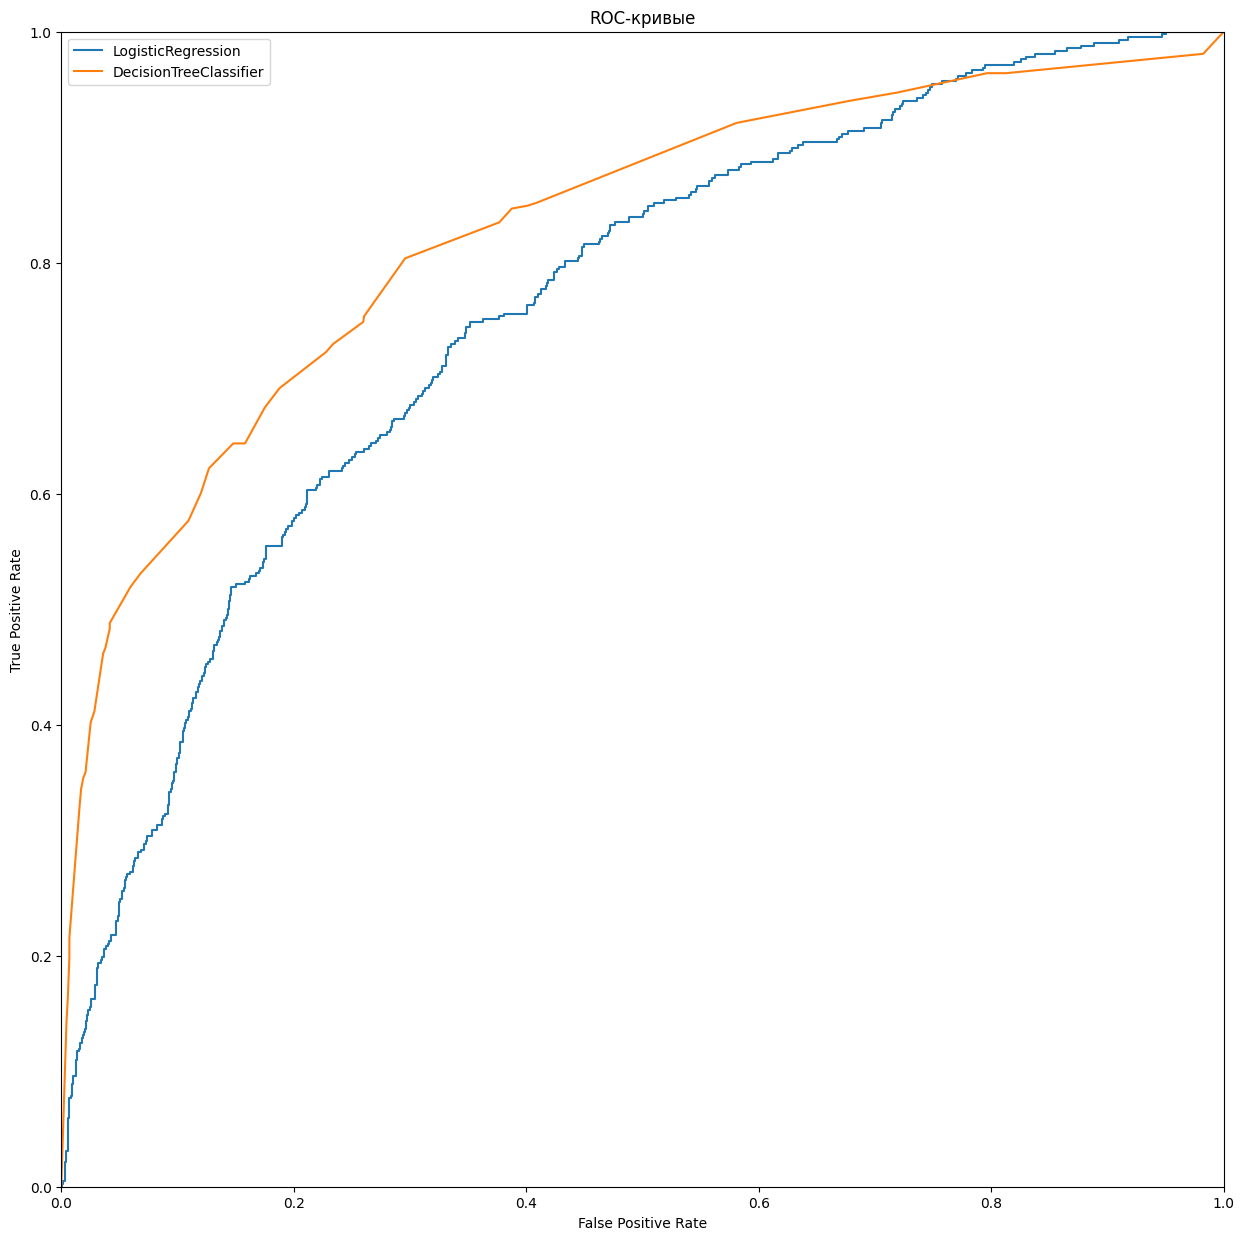

Наилучшая модель из всех:
DecisionTreeClassifier(max_depth=7, min_samples_split=8, random_state=12345)
F1 = 0.58
____________________________________________________________________________________________________



In [16]:
best_no_balance_model = find_model(features_train, target_train)

**Вывод:**
1. Созданы датафреймы с признаками и целевым признаком.  
2. Датафррейм разделен на обучающую, валидационную и тестовые выборки в соотношении 60:20:20.  
3. В обучающей выборке наблюдается дисбаланс: отношение положительных объектов к общему количеству объектов - 0.20.  
4. Стандартизированы некатегориальные признаки, категориальные данные "geography" и "gender" преобразованы методом прямого кодирования (OHE).
5. На несбалансированной выборке лучший результат показала модель DecisionTreeClassifier(max_depth=7, min_samples_split=8, random_state=12345): значение F1 = 0.58.

## Борьба с дисбалансом

### Определение лучшей модели, обученной на выборке, сбалансированной методом SMOTE

**Балансировка данных методом SMOTE**

In [17]:
sm = SMOTE(random_state=rand_state, k_neighbors=5)
features_sm, target_sm = sm.fit_resample(features_train, target_train)

Проверяем баланс:

In [18]:
print('{:.2f}'.format(target_sm.mean()))

0.50


**Определение лучшей модели, обученной на выборке, сбалансированной методом SMOTE**

Лучшая модель LogisticRegression:
LogisticRegression(C=1, random_state=12345, solver='liblinear')
F1 = 0.49
AUC_ROC = 0.75
____________________________________________________________________________________________________

Лучшая модель DecisionTreeClassifier:
DecisionTreeClassifier(max_depth=7, min_samples_leaf=7, random_state=12345)
F1 = 0.56
AUC_ROC = 0.82
____________________________________________________________________________________________________



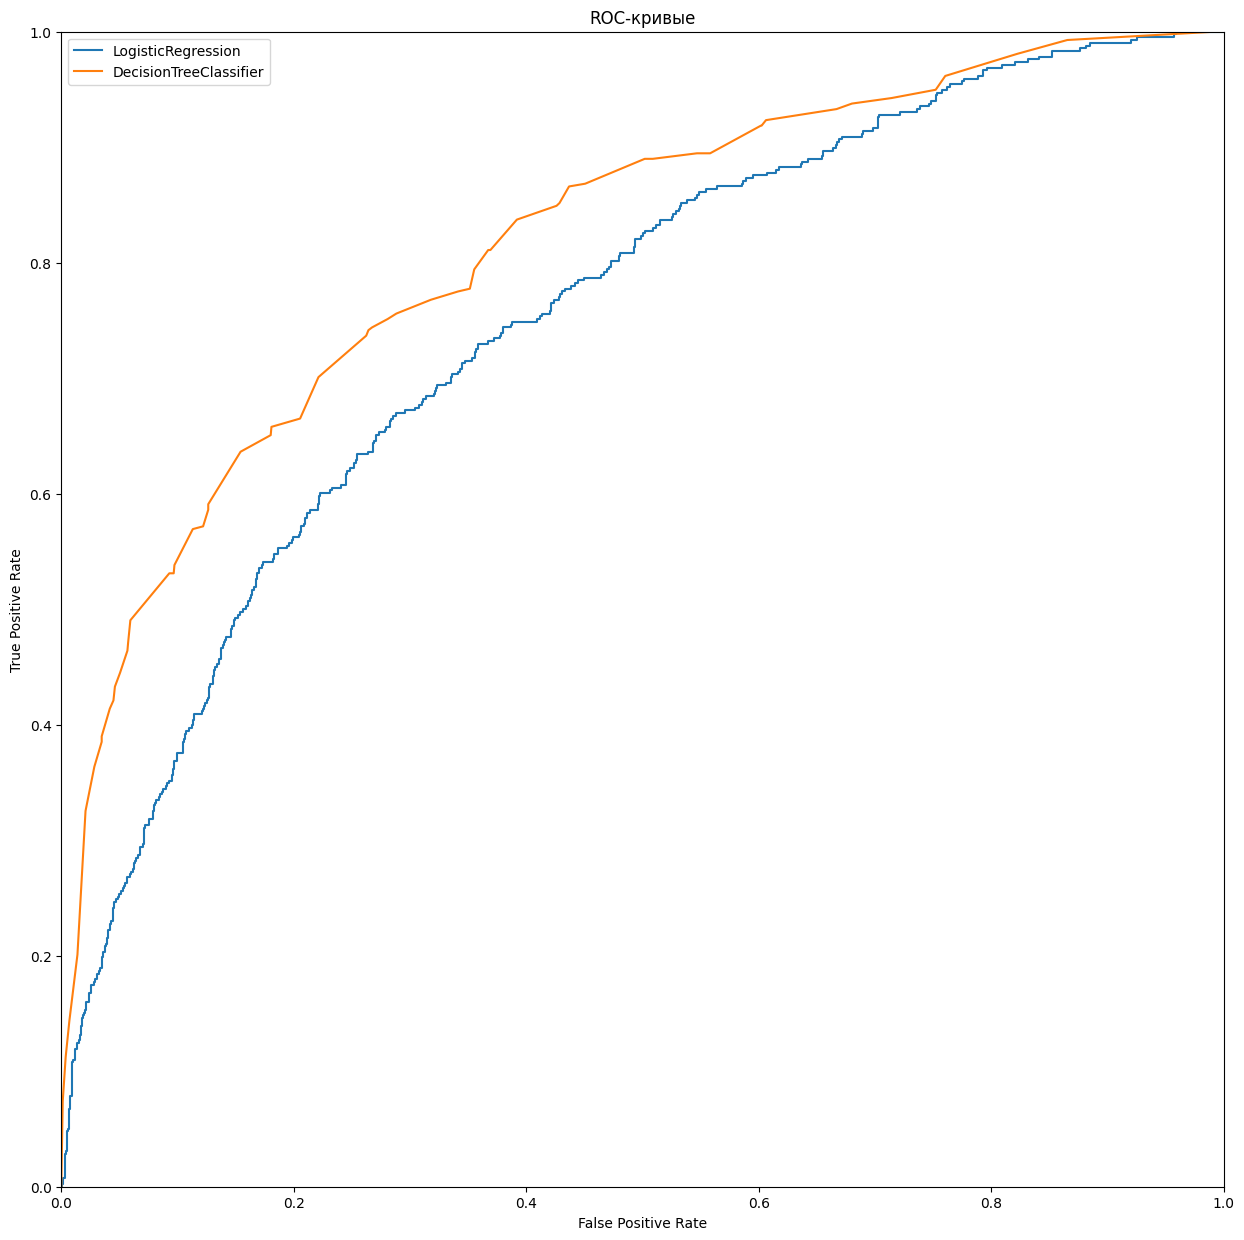

Наилучшая модель из всех:
DecisionTreeClassifier(max_depth=7, min_samples_leaf=7, random_state=12345)
F1 = 0.56
____________________________________________________________________________________________________



In [19]:
best_model_sm = find_model(features_sm, target_sm)

### Определение лучшей модели, обученной на выборке, сбалансированной методом RandomUnderSampler

****Балансировка данных методом RandomUnderSampler****

In [20]:
us = RandomUnderSampler(random_state=rand_state) 
features_us, target_us = us.fit_resample(features_train, target_train)

Проверяем баланс:

In [21]:
print('{:.2f}'.format(target_us.mean()))

0.50


**Определение лучшей модели, обученной на выборке, сбалансированной методом RandomUnderSampler**

Лучшая модель LogisticRegression:
LogisticRegression(C=1, random_state=12345, solver='liblinear')
F1 = 0.49
AUC_ROC = 0.76
____________________________________________________________________________________________________

Лучшая модель DecisionTreeClassifier:
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=12345)
F1 = 0.54
AUC_ROC = 0.82
____________________________________________________________________________________________________



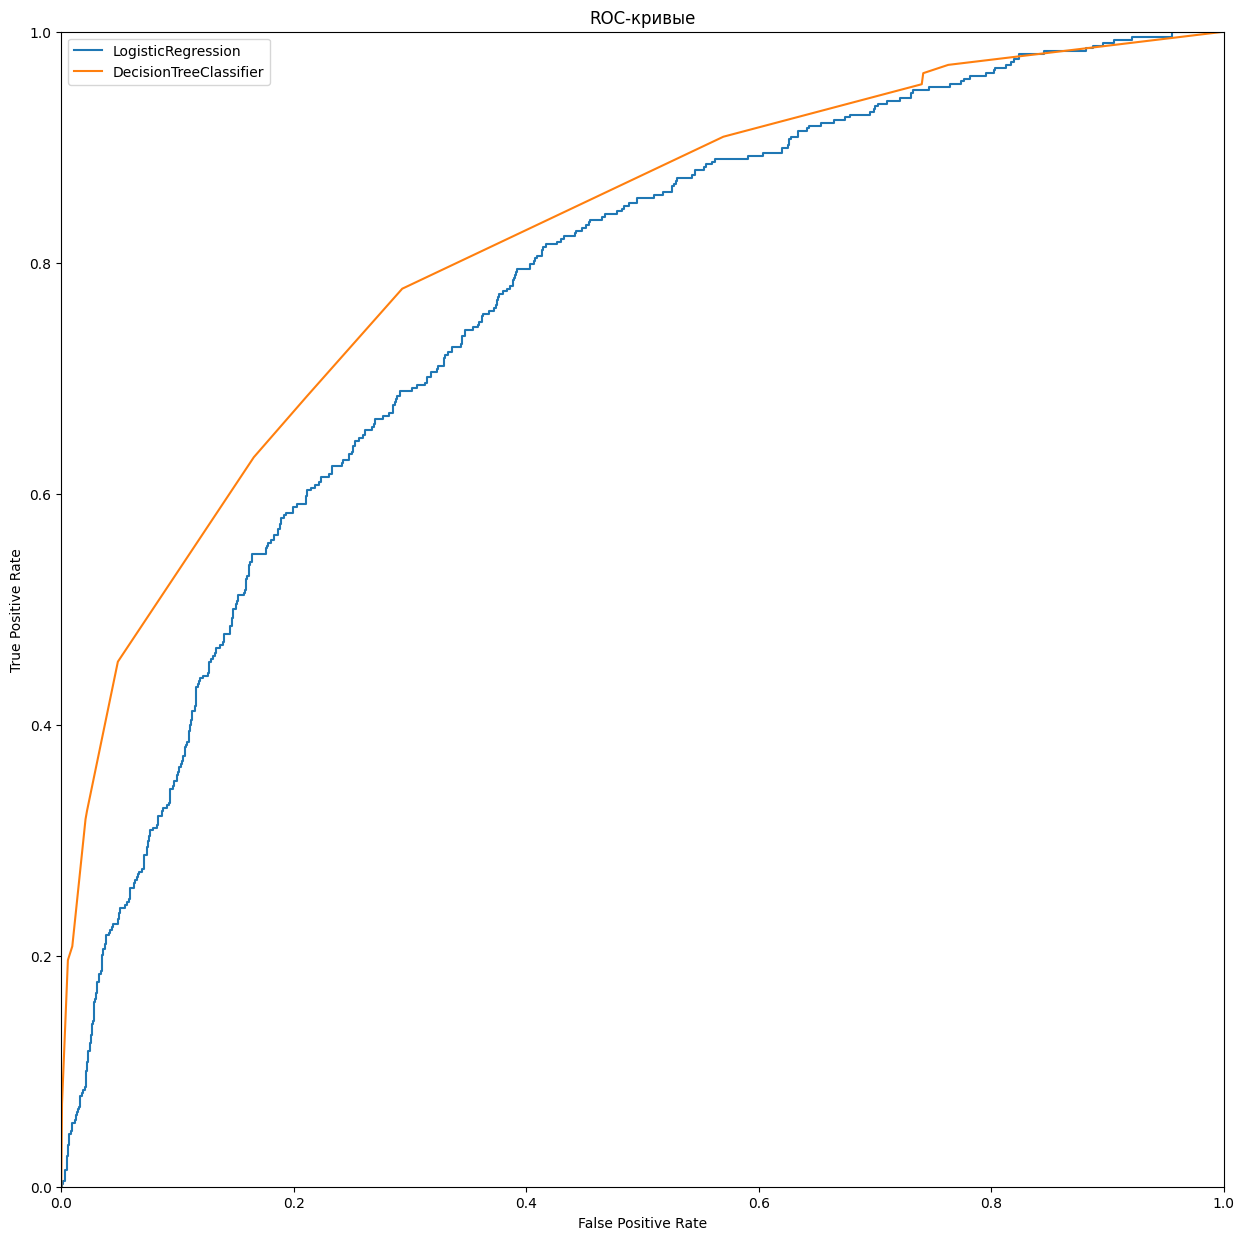

Наилучшая модель из всех:
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=12345)
F1 = 0.54
____________________________________________________________________________________________________



In [22]:
best_model_us = find_model(features_us, target_us)

### Определение лучшей модели, обученной на выборке, сбалансированной взвешиванием классов

Лучшая модель LogisticRegression:
LogisticRegression(C=1, class_weight='balanced', random_state=12345,
                   solver='liblinear')
F1 = 0.49
AUC_ROC = 0.76
____________________________________________________________________________________________________

Лучшая модель DecisionTreeClassifier:
DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=7,
                       random_state=12345)
F1 = 0.58
AUC_ROC = 0.83
____________________________________________________________________________________________________



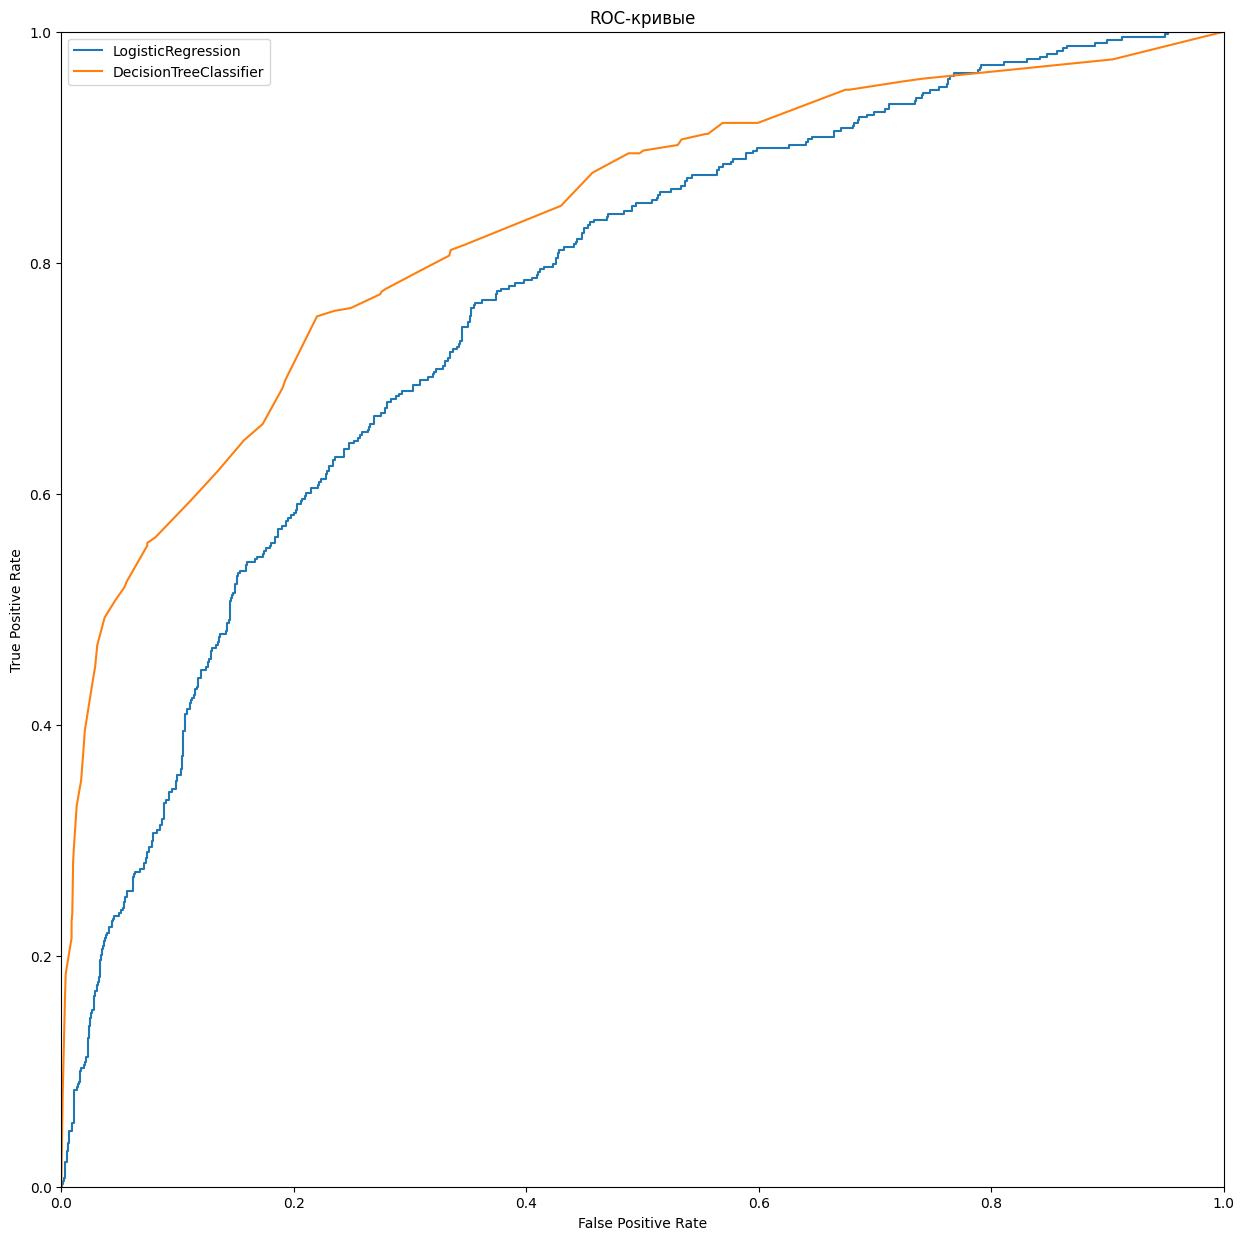

Наилучшая модель из всех:
DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=7,
                       random_state=12345)
F1 = 0.58
____________________________________________________________________________________________________



In [23]:
best_model_cw = find_model(features_train, target_train, cl_weight='balanced')

**Вывод:**
1. При всех методах балансировки наилучший результат показала модель "RandomForestClassifier", наихудший - "LogisticRegression".
2. Наилучший результат показала модель RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=7, random_state=12345), обученная на выборке, сбалансированной взвешиванием классов:  
 - F1 = 0.63;
 - AUC_ROC = 0.86.  

3. После балансировки значительно увеличилось качество модели LogisticRegression: значение метрики F1 возросло с 0.33 до 0.48-0.49.
5. В целом метрики AUC_ROC как для моделей, обученных на сбалансированных выборках, так и на несбалансированной сопоставимы и находятся в диапазоне:
 - LogisticRegression - 0.75-0.76;
 - DecisionTreeClassifier: 0.81-0.83;
 - RandomForestClassifier: 0.83-0.86;
6. Метрика AUC_ROC менее чувствительна к дисбалансу в обучающей выборке, нежели метрика F1.

## Тестирование модели

Тест проводим на наиболее качественной модели - RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=7, random_state=12345), обученной на выборке, сбалансированной взвешиванием классов.  
Объединяем валидационную и обучающую выборки:

In [24]:
features_train_for_test = pd.concat([features_train, features_valid])
target_train_for_test = pd.concat([target_train, target_valid])

На данных выборках обучаем модель:

In [25]:
best_model_cw.fit(features_train_for_test, target_train_for_test)
predicted_test = best_model_cw.predict(features_test)
result = f1_score(target_test, predicted_test)
probabilities_test = best_model_cw.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('Метрики лучшей модели на тестовой выборке:')
print('F1 = {:.2f}'.format(result))
print('AUC_ROC = {:.2f}'.format(auc_roc))

Метрики лучшей модели на тестовой выборке:
F1 = 0.58
AUC_ROC = 0.84


**Вывод:**  
Результаты проверки наиболее качественной модели на тестовой выборке (F1=0.61) превосходят минимально допустимые, заложенные в техническом задании (F1=0.59).  
Модель RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=7, random_state=12345) достаточно качественна для решения задачи прогнозирования.

## Общий вывод

**Подготовка данных**
1. Обработаны названия столбцов: приведены к нижнему регистру, убран "верблюжий регистр".
2. Обработаны пропущенные значения.

**Исследование задачи**
1. Созданы датафреймы с признаками и целевым признаком.  
2. Датафррейм разделен на обучающую, валидационную и тестовые выборки в соотношении 60:20:20.  
3. В обучающей выборке наблюдается дисбаланс: отношение положительных объектов к общему количеству объектов - 0.20.  
4. Стандартизированы некатегориальные признаки, категориальные данные "geography" и "gender" преобразованы методом прямого кодирования (OHE).
5. На несбалансированной выборке лучший результат показала модель DecisionTreeClassifier(max_depth=7, min_samples_split=8, random_state=12345): значение F1 = 0.58.

**Борьба с дисбалансом**
1. При всех методах балансировки наилучший результат показала модель "RandomForestClassifier", наихудший - "LogisticRegression".
2. Наилучший результат показала модель RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=7, random_state=12345), обученная на выборке, сбалансированной взвешиванием классов:  
 - F1 = 0.63;
 - AUC_ROC = 0.86.  

3. После балансировки значительно увеличилось качество модели LogisticRegression: значение метрики F1 возросло с 0.33 до 0.48-0.49.
5. В целом метрики AUC_ROC как для моделей, обученных на сбалансированных выборках, так и на несбалансированной сопоставимы и находятся в диапазоне:
 - LogisticRegression - 0.75-0.76;
 - DecisionTreeClassifier: 0.81-0.83;
 - RandomForestClassifier: 0.83-0.86;
6. Метрика AUC_ROC менее чувствительна к дисбалансу в обучающей выборке, нежели метрика F1.

**Тестирование модели**  


Результаты проверки наиболее качественной модели на тестовой выборке (F1=0.61) превосходят минимально допустимые, заложенные в техническом задании (F1=0.59).  
Модель RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=7, random_state=12345) достаточно качественна для решения задачи прогнозирования.